In [1]:
import nltk, re, math, collections, unicodedata, nltk.classify.util, nltk.metrics

from nltk.classify import NaiveBayesClassifier

#https://www.nltk.org/_modules/nltk/classify/naivebayes.html

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google_play_scraper import app

In [4]:
# Extracting  50000 reviews of pinterest from play store
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.pinterest',
    lang='en',
    country='in',
    sort=Sort.NEWEST,
    count=50000,
    
)

In [5]:
result

[{'reviewId': '91b7629c-b7c1-4493-9ec7-677cf5c2b987',
  'userName': 'Nakandi Caroline',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocJyy80oMKUeAA9okHtnXsrALxKxAjvNJ1dnOlq8EalV=mo',
  'content': "It's good in giving information about any thing.",
  'score': 4,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '9.17.0',
  'at': datetime.datetime(2023, 12, 20, 20, 22, 6),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '9.17.0'},
 {'reviewId': 'aa74c09c-70ad-44d1-90f1-b098c75a9817',
  'userName': 'Siam Tangina',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocJfgVl_Z9WAipj-brkSRY_LBIVWdSU47g4xuIR4Zcqd=mo',
  'content': '❤️❤️',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': None,
  'at': datetime.datetime(2023, 12, 20, 20, 18, 16),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': None},
 {'reviewId': '3de73694-8178-417e-ae21-53fc00b23d95',
  'userName': 'Monika Mankotia',
  'userImage': 'https://play-lh.googleusercontent.

In [6]:
df_rev = pd.DataFrame(np.array(result),columns=['review'])

df_rev = df_rev.join(pd.DataFrame(df_rev.pop('review').tolist()))

df_rev['content']

0         It's good in giving information about any thing.
1                                                     ❤️❤️
2                                              Fantastic 😍
3                                                     nice
4                                Always my first resource.
                               ...                        
49995                        Too many ads. Good otherwise.
49996                                        Love this app
49997    I am recieving way too much. Give me a break p...
49998    Updated 4/17/23: Why are birthdays all of the ...
49999    I love pinterest and I dont see an issue besid...
Name: content, Length: 50000, dtype: object

In [7]:
df_rev = pd.DataFrame(np.array(result), columns=['review'])

df_rev = df_rev.join(pd.DataFrame(df_rev.pop('review').tolist()))

filtered_reviews = df_rev[['content','score']]

print(filtered_reviews[['content','score']])


                                                 content  score
0       It's good in giving information about any thing.      4
1                                                   ❤️❤️      5
2                                            Fantastic 😍      5
3                                                   nice      5
4                              Always my first resource.      5
...                                                  ...    ...
49995                      Too many ads. Good otherwise.      2
49996                                      Love this app      5
49997  I am recieving way too much. Give me a break p...      3
49998  Updated 4/17/23: Why are birthdays all of the ...      1
49999  I love pinterest and I dont see an issue besid...      5

[50000 rows x 2 columns]


In [8]:
filtered_reviews= filtered_reviews.dropna(subset=['content'])

filtered_reviews = filtered_reviews[filtered_reviews['content'].apply(lambda x: len(str(x).split()) > 20)] 
#extracting the content which are more than 20 words

In [9]:
filtered_reviews['content'].head()

6     I use it daily to look up scriptures, recipes,...
8     I just hate how it recommends me extremely ran...
14    this app is great because you can easily get p...
15    Absolutely worst app ever do not download !!! ...
17    Pinterest used to be my fav aap but these rece...
Name: content, dtype: object

In [10]:
filtered_reviews['content'].shape

(9936,)

In [11]:
# converting the reviews into csv file
filtered_reviews[['content','score']].to_csv(r"C:\Users\Karishma P\OneDrive\Desktop\ratings.csv", index=False)

# Naive Bayes Classifier

In [12]:
Ratings1 = open('C://Users//Karishma P//Downloads//Ratings 1', errors="ignore")
Ratings2 = open('C://Users//Karishma P//Downloads//Ratings 02', errors="ignore")
Ratings3 = open('C://Users//Karishma P//Downloads//Ratings 3', errors="ignore")
Ratings4 = open('C://Users//Karishma P//Downloads//Ratings 4', errors="ignore")
Ratings5 = open('C://Users//Karishma P//Downloads//Ratings 5', errors="ignore")
New = open("C://Users//Karishma P//Downloads//New comment", errors = "ignore")


In [13]:
Ratings1_read = Ratings1.read()
Ratings2_read = Ratings2.read()
Ratings3_read = Ratings3.read()
Ratings4_read = Ratings4.read()
Ratings5_read = Ratings5.read()

New_read = New.read()


import re

Ratings1_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Ratings1_read)
Ratings2_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Ratings2_read)
Ratings3_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Ratings3_read)
Ratings4_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Ratings4_read)
Ratings5_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Ratings5_read)
New_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', New_read)

Ratings1_string = unicodedata.normalize('NFKD', Ratings1_clean).encode('ascii','ignore')
Ratings2_string = unicodedata.normalize('NFKD', Ratings2_clean).encode('ascii','ignore')
Ratings3_string = unicodedata.normalize('NFKD', Ratings3_clean).encode('ascii','ignore')
Ratings4_string = unicodedata.normalize('NFKD', Ratings4_clean).encode('ascii','ignore')
Ratings5_string = unicodedata.normalize('NFKD', Ratings5_clean).encode('ascii','ignore')
New_string = unicodedata.normalize('NFKD', New_clean).encode('ascii','ignore')

In [14]:
from nltk.corpus import stopwords
def word_feats(words):
    return dict([(word, True) for word in words.split() if word not in stopset])

stopset = list(set(stopwords.words('english')))



Ratings1Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings1_string))
Ratings2Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings2_string))
Ratings3Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings3_string))
Ratings4Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings4_string))
Ratings5Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings5_string))

NewWords = re.findall(r"[\w']+|[.,!?;]", str(New_string))

In [15]:
func_words = open('C://Users//Karishma P//OneDrive//Desktop//Term-5//Text analytics//functionWordlist - Copy.txt', 'r', encoding='utf-8')
func_words_read = func_words.read()
func_words.close()  # Always close the file after reading

func_words_string = unicodedata.normalize('NFKD', func_words_read).encode('ascii', 'ignore')
func_words_string[0:20]
funcstring = func_words_string.lower()
funcWords = re.findall(r"[\w']+|[.,!?;]", str(funcstring))
funcWords[0:20]

Ratings1content = [x for x in Ratings1Words if x not in funcWords]
len(Ratings1content)
Ratings2content = [x for x in Ratings2Words if x not in funcWords]
len(Ratings2content)
Ratings3content = [x for x in Ratings3Words if x not in funcWords]
len(Ratings3content)
Ratings4content = [x for x in Ratings4Words if x not in funcWords]
len(Ratings4content)
Ratings5content = [x for x in Ratings5Words if x not in funcWords]
len(Ratings5content)

Newcontent = [x for x in NewWords if x not in funcWords]
len(Newcontent)


Ratings1_feats = [(word_feats(f), 'Ratings1') for f in Ratings1content ]
Ratings2_feats = [(word_feats(f), 'Ratings2') for f in Ratings2content ]
Ratings3_feats = [(word_feats(f), 'Ratings3') for f in Ratings3content ]
Ratings4_feats = [(word_feats(f), 'Ratings4') for f in Ratings4content ]
Ratings5_feats = [(word_feats(f), 'Ratings5') for f in Ratings5content ]



Ratings1cutoff = int(len(Ratings1_feats)*3/4)
Ratings2cutoff = int(len(Ratings2_feats)*3/4)
Ratings3cutoff = int(len(Ratings3_feats)*3/4)
Ratings4cutoff = int(len(Ratings4_feats)*3/4)
Ratings5cutoff = int(len(Ratings5_feats)*3/4)

trainfeats = Ratings1_feats[:Ratings1cutoff] + Ratings2_feats[:Ratings2cutoff] + Ratings3_feats[:Ratings3cutoff] + Ratings4_feats[:Ratings4cutoff] + Ratings5_feats[:Ratings5cutoff]
testfeats = Ratings1_feats[Ratings1cutoff:] + Ratings2_feats[Ratings2cutoff:] + Ratings3_feats[Ratings3cutoff:] + Ratings4_feats[Ratings4cutoff:] + Ratings5_feats[Ratings5cutoff:]


In [16]:
New_feats = [(word_feats(f), "New") for f in Newcontent ]

In [17]:
trainfeats

[({"b'After": True}, 'Ratings1'),
 ({'10': True}, 'Ratings1'),
 ({'years': True}, 'Ratings1'),
 ({'I': True}, 'Ratings1'),
 ({'deleted': True}, 'Ratings1'),
 ({'account': True}, 'Ratings1'),
 ({'feel': True}, 'Ratings1'),
 ({'like': True}, 'Ratings1'),
 ({'burdening': True}, 'Ratings1'),
 ({'weight': True}, 'Ratings1'),
 ({'gone': True}, 'Ratings1'),
 ({'.': True}, 'Ratings1'),
 ({'For': True}, 'Ratings1'),
 ({'6': True}, 'Ratings1'),
 ({'months': True}, 'Ratings1'),
 ({'I': True}, 'Ratings1'),
 ({'endure': True}, 'Ratings1'),
 ({'ads': True}, 'Ratings1'),
 ({'promote': True}, 'Ratings1'),
 ({'Christianity': True}, 'Ratings1'),
 ({'well': True}, 'Ratings1'),
 ({'ads': True}, 'Ratings1'),
 ({'Christian': True}, 'Ratings1'),
 ({'books': True}, 'Ratings1'),
 ({'supporting': True}, 'Ratings1'),
 ({'anti': True}, 'Ratings1'),
 ({'abortion': True}, 'Ratings1'),
 ({'abortion': True}, 'Ratings1'),
 ({'misinformation': True}, 'Ratings1'),
 ({'.': True}, 'Ratings1'),
 ({'Very': True}, 'Ratings1'

In [18]:
import nltk
import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)
Classifier = nltk.NaiveBayesClassifier.train(trainfeats)

print ('accuracy:'), nltk.classify.util.accuracy(Classifier, testfeats)

accuracy:


(None, 0.373683903236479)

In [19]:
Classifier.show_most_informative_features()

Most Informative Features
                    AAAa = True           Rating : Rating =     17.5 : 1.0
               suspended = True           Rating : Rating =     13.5 : 1.0
                  nGreat = True           Rating : Rating =     13.4 : 1.0
                  stupid = True           Rating : Rating =     13.4 : 1.0
                    Love = True           Rating : Rating =     13.2 : 1.0
                 Overall = True           Rating : Rating =     12.0 : 1.0
                unusable = True           Rating : Rating =     11.8 : 1.0
                   nLove = True           Rating : Rating =     11.7 : 1.0
                    nice = True           Rating : Rating =     11.6 : 1.0
               uninstall = True           Rating : Rating =     11.4 : 1.0


In [20]:
import random
random.shuffle(trainfeats)
#Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)

Classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:'), nltk.classify.util.accuracy(Classifier, testfeats)

## Another way
## nltk.classify.accuracy(Classifier, testfeats)

print ('accuracy:', nltk.classify.util.accuracy(Classifier, trainfeats))
print (Classifier.show_most_informative_features(5))

accuracy:
accuracy: 0.4382862221760878
Most Informative Features
                    AAAa = True           Rating : Rating =     17.5 : 1.0
               suspended = True           Rating : Rating =     13.5 : 1.0
                  nGreat = True           Rating : Rating =     13.4 : 1.0
                  stupid = True           Rating : Rating =     13.4 : 1.0
                    Love = True           Rating : Rating =     13.2 : 1.0
None


# Function words

In [21]:
func_words = open('C://Users//Karishma P//OneDrive//Desktop//Term-5//Text analytics//functionWordlist - Copy.txt', 'r', encoding='utf-8')
func_words_read = func_words.read()
func_words.close()  # Always close the file after reading

func_words_string = unicodedata.normalize('NFKD', func_words_read).encode('ascii', 'ignore')
func_words_string[0:20]
funcstring = func_words_string.lower()
funcWords = re.findall(r"[\w']+|[.,!?;]", str(funcstring))
funcWords[0:20]

Ratings1content = [x for x in Ratings1Words if x not in funcWords]
len(Ratings1content)
Ratings2content = [x for x in Ratings2Words if x not in funcWords]
len(Ratings2content)
Ratings3content = [x for x in Ratings3Words if x not in funcWords]
len(Ratings3content)
Ratings4content = [x for x in Ratings4Words if x not in funcWords]
len(Ratings4content)
Ratings5content = [x for x in Ratings5Words if x not in funcWords]
len(Ratings5content)

Newcontent = [x for x in NewWords if x not in funcWords]
len(Newcontent)


Ratings1_feats = [(word_feats(f), 'Ratings1') for f in Ratings1content ]
Ratings2_feats = [(word_feats(f), 'Ratings2') for f in Ratings2content ]
Ratings3_feats = [(word_feats(f), 'Ratings3') for f in Ratings3content ]
Ratings4_feats = [(word_feats(f), 'Ratings4') for f in Ratings4content ]
Ratings5_feats = [(word_feats(f), 'Ratings5') for f in Ratings5content ]



Ratings1cutoff = int(len(Ratings1_feats)*3/4)
Ratings2cutoff = int(len(Ratings2_feats)*3/4)
Ratings3cutoff = int(len(Ratings3_feats)*3/4)
Ratings4cutoff = int(len(Ratings4_feats)*3/4)
Ratings5cutoff = int(len(Ratings5_feats)*3/4)

trainfeats = Ratings1_feats[:Ratings1cutoff] + Ratings2_feats[:Ratings2cutoff] + Ratings3_feats[:Ratings3cutoff] + Ratings4_feats[:Ratings4cutoff] + Ratings5_feats[:Ratings5cutoff]
testfeats = Ratings1_feats[Ratings1cutoff:] + Ratings2_feats[Ratings2cutoff:] + Ratings3_feats[Ratings3cutoff:] + Ratings4_feats[Ratings4cutoff:] + Ratings5_feats[Ratings5cutoff:]



import random
random.shuffle(trainfeats)
#Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)

Classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:'), nltk.classify.util.accuracy(Classifier, testfeats)

## Another way
## nltk.classify.accuracy(Classifier, testfeats)

print ('accuracy:', nltk.classify.util.accuracy(Classifier, trainfeats))
print (Classifier.show_most_informative_features(5))

accuracy:
accuracy: 0.4382862221760878
Most Informative Features
                    AAAa = True           Rating : Rating =     17.5 : 1.0
               suspended = True           Rating : Rating =     13.5 : 1.0
                  nGreat = True           Rating : Rating =     13.4 : 1.0
                  stupid = True           Rating : Rating =     13.4 : 1.0
                    Love = True           Rating : Rating =     13.2 : 1.0
None


In [22]:
refsets = collections.defaultdict(set)

testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(testfeats):
    refsets[label].add(i)
    observed = Classifier.classify(feats)
    testsets[observed].add(i)

# All words

In [23]:
from nltk.corpus import stopwords
def word_feats(words):
	return dict([(word, True) for word in words.split() if word not in stopset])

stopset = list(set(stopwords.words('english')))



Ratings1Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings1_string))
Ratings2Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings2_string))
Ratings3Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings3_string))
Ratings4Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings4_string))
Ratings5Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings5_string))



Ratings1_feats = [(word_feats(f), 'Ratings1') for f in Ratings1Words ]
Ratings2_feats = [(word_feats(f), 'Ratings2') for f in Ratings2Words ]
Ratings3_feats = [(word_feats(f), 'Ratings3') for f in Ratings3Words ]
Ratings4_feats = [(word_feats(f), 'Ratings4') for f in Ratings4Words ]
Ratings5_feats = [(word_feats(f), 'Ratings5') for f in Ratings5Words ]




Ratings1cutoff = int(len(Ratings1_feats)*3/4)
Ratings2cutoff = int(len(Ratings2_feats)*3/4)
Ratings3cutoff = int(len(Ratings3_feats)*3/4)
Ratings4cutoff = int(len(Ratings4_feats)*3/4)
Ratings5cutoff = int(len(Ratings5_feats)*3/4)



trainfeats = Ratings1_feats[:Ratings1cutoff] + Ratings2_feats[:Ratings2cutoff] + Ratings3_feats[:Ratings3cutoff] + Ratings4_feats[:Ratings4cutoff] + Ratings5_feats[:Ratings5cutoff]
testfeats = Ratings1_feats[Ratings1cutoff:] + Ratings2_feats[Ratings2cutoff:] + Ratings3_feats[Ratings3cutoff:] + Ratings4_feats[Ratings4cutoff:] + Ratings5_feats[Ratings5cutoff:]

import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)

Classifier = NaiveBayesClassifier.train(trainfeats)


print ('accuracy:', nltk.classify.util.accuracy(Classifier, testfeats))

print (Classifier.show_most_informative_features(10))

accuracy: 0.3670114367488453
Most Informative Features
                    AAAa = True           Rating : Rating =     17.0 : 1.0
               suspended = True           Rating : Rating =     14.0 : 1.0
                  stupid = True           Rating : Rating =     13.8 : 1.0
                  nGreat = True           Rating : Rating =     13.7 : 1.0
                    Love = True           Rating : Rating =     12.8 : 1.0
                unusable = True           Rating : Rating =     12.2 : 1.0
               uninstall = True           Rating : Rating =     11.8 : 1.0
                 Overall = True           Rating : Rating =     11.7 : 1.0
                   nLove = True           Rating : Rating =     11.7 : 1.0
                 support = True           Rating : Rating =     11.4 : 1.0
None


# Content + Function words

In [24]:
from nltk.corpus import stopwords
def word_feats(words):
	return dict([(word, True) for word in words.split() if word not in stopset])

stopset = list(set(stopwords.words('english')))



Ratings1Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings1_string))
Ratings2Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings2_string))
Ratings3Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings3_string))
Ratings4Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings4_string))
Ratings5Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings5_string))


func_words = open('C://Users//Karishma P//OneDrive//Desktop//Term-5//Text analytics//functionWordlist - Copy.txt', 'r')
func_words_read = func_words.read()
#func_word_uni= func_words_read.decode('utf-8')
func_word_uni= func_words_read
func_words_string = unicodedata.normalize('NFKD', func_word_uni).encode('ascii','ignore')
func_words_string[0:20]
funcstring = func_words_string.lower()
funcWords = re.findall(r"[\w']+|[.,!?;]", str(funcstring))
funcWords[0:20]

Ratings1content = [x for x in Ratings1Words if x not in funcWords]
len(Ratings1content)
Ratings2content = [x for x in Ratings2Words if x not in funcWords]
len(Ratings2content)
Ratings3content = [x for x in Ratings3Words if x not in funcWords]
len(Ratings3content)
Ratings4content = [x for x in Ratings4Words if x not in funcWords]
len(Ratings4content)
Ratings5content = [x for x in Ratings5Words if x not in funcWords]
len(Ratings5content)



Ratings1func = [ x for x in Ratings1Words if x not in Ratings1content]
Ratings2func = [ x for x in Ratings2Words if x not in Ratings2content]
Ratings3func = [ x for x in Ratings3Words if x not in Ratings3content]
Ratings4func = [ x for x in Ratings4Words if x not in Ratings4content]
Ratings5func = [ x for x in Ratings5Words if x not in Ratings5content]


Ratings1_feats = [(word_feats(f), 'Ratings1') for f in Ratings1func ]+[(word_feats(f), 'Ratings1') for f in Ratings1content ]
Ratings2_feats = [(word_feats(f), 'Ratings2') for f in Ratings2func ]+[(word_feats(f), 'Ratings2') for f in Ratings2content ]
Ratings3_feats = [(word_feats(f), 'Ratings3') for f in Ratings3func ]+[(word_feats(f), 'Ratings3') for f in Ratings3content ]
Ratings4_feats = [(word_feats(f), 'Ratings4') for f in Ratings4func ]+[(word_feats(f), 'Ratings4') for f in Ratings4content ]
Ratings5_feats = [(word_feats(f), 'Ratings5') for f in Ratings5func ]+[(word_feats(f), 'Ratings5') for f in Ratings5content ]


Ratings1cutoff = int(len(Ratings1_feats)*3/4)
Ratings2cutoff = int(len(Ratings2_feats)*3/4)
Ratings3cutoff = int(len(Ratings3_feats)*3/4)
Ratings4cutoff = int(len(Ratings4_feats)*3/4)
Ratings5cutoff = int(len(Ratings5_feats)*3/4)


trainfeats = Ratings1_feats[:Ratings1cutoff] + Ratings2_feats[:Ratings2cutoff] + Ratings3_feats[:Ratings3cutoff] + Ratings4_feats[:Ratings4cutoff] + Ratings5_feats[:Ratings5cutoff]
testfeats = Ratings1_feats[Ratings1cutoff:] + Ratings2_feats[Ratings2cutoff:] + Ratings3_feats[Ratings3cutoff:] + Ratings4_feats[Ratings4cutoff:] + Ratings5_feats[Ratings5cutoff:]




import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)


Classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:'), nltk.classify.util.accuracy(Classifier, testfeats)

accuracy:


(None, 0.3668136496375842)

# POS tags

In [25]:
Ratings1_tokens = nltk.word_tokenize(str(Ratings1_string))
Ratings2_tokens = nltk.word_tokenize(str(Ratings2_string))
Ratings3_tokens = nltk.word_tokenize(str(Ratings3_string))
Ratings4_tokens = nltk.word_tokenize(str(Ratings4_string))
Ratings5_tokens = nltk.word_tokenize(str(Ratings5_string))




Ratings1_tags = nltk.pos_tag(Ratings1_tokens)
Ratings2_tags = nltk.pos_tag(Ratings2_tokens)
Ratings3_tags = nltk.pos_tag(Ratings3_tokens)
Ratings4_tags = nltk.pos_tag(Ratings4_tokens)
Ratings5_tags = nltk.pos_tag(Ratings5_tokens)


from nltk.corpus import stopwords
def word_feats(words):
    return [word for word in words.split() if word not in stopset]

stopset = list(set(stopwords.words('english')))

Ratings1Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings1_string))
Ratings2Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings2_string))
Ratings3Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings3_string))
Ratings4Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings4_string))
Ratings5Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings5_string))



allwords= Ratings1Words+Ratings2Words+Ratings3Words+Ratings4Words+Ratings5Words
unique_words= list(dict.fromkeys(allwords))

most_common_words=nltk.FreqDist()

for word in unique_words:
    word = word.lower()
    most_common_words[word] += 1


common_words = [words for (words, count) in most_common_words.most_common(1000)]

def pos_features(word,tag):
	features = {}
	features[(word,tag)] = word.lower().endswith(word)
	return features



##def pos_features(word):
	features = {}
	for words in common_words:
		features['endswith({})'.format(words)] = word.lower().endswith(word)
	return features


Ratings1_feats= [(pos_features(n,g), 'Ratings1') for (n,g) in Ratings1_tags]
Ratings2_feats= [(pos_features(n,g), 'Ratings2') for (n,g) in Ratings2_tags]
Ratings3_feats= [(pos_features(n,g), 'Ratings3') for (n,g) in Ratings3_tags]
Ratings4_feats= [(pos_features(n,g), 'Ratings4') for (n,g) in Ratings4_tags]
Ratings5_feats= [(pos_features(n,g), 'Ratings5') for (n,g) in Ratings5_tags]


Ratings1cutoff = int(len(Ratings1_feats)*3/4)
Ratings2cutoff = int(len(Ratings2_feats)*3/4)
Ratings3cutoff = int(len(Ratings3_feats)*3/4)
Ratings4cutoff = int(len(Ratings4_feats)*3/4)
Ratings5cutoff = int(len(Ratings5_feats)*3/4)

trainfeats = Ratings1_feats[:Ratings1cutoff] + Ratings2_feats[:Ratings2cutoff] + Ratings3_feats[:Ratings3cutoff] + Ratings4_feats[:Ratings4cutoff] + Ratings5_feats[:Ratings5cutoff]
testfeats = Ratings1_feats[Ratings1cutoff:] + Ratings2_feats[Ratings2cutoff:] + Ratings3_feats[Ratings3cutoff:] + Ratings4_feats[Ratings4cutoff:] + Ratings5_feats[Ratings5cutoff:]


import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)

Classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:', nltk.classify.util.accuracy(Classifier, testfeats))

##print ('accuracy:'), nltk.classify.util.accuracy(Classifier, testfeats)

## Another way
## nltk.classify.accuracy(Classifier, testfeats)

print ('accuracy:', nltk.classify.util.accuracy(Classifier, trainfeats))
print (Classifier.show_most_informative_features(10))

accuracy: 0.3635956849845201
accuracy: 0.428169445609056
Most Informative Features
             ('b', 'NN') = True           Rating : Rating =  45639.5 : 1.0
          ('love', 'IN') = True           Rating : Rating =     28.9 : 1.0
         ('AAAa', 'NNP') = False          Rating : Rating =     17.0 : 1.0
    ('suspended', 'VBN') = True           Rating : Rating =     15.5 : 1.0
            ('D', 'NNP') = False          Rating : Rating =     15.3 : 1.0
        ('helps', 'VBZ') = True           Rating : Rating =     15.0 : 1.0
        ('stupid', 'JJ') = True           Rating : Rating =     12.6 : 1.0
          ('nice', 'JJ') = True           Rating : Rating =     12.6 : 1.0
          ('AAA', 'NNP') = False          Rating : Rating =     12.2 : 1.0
       ("can\\'t", 'JJ') = True           Rating : Rating =     10.9 : 1.0
None


# N-grams

In [26]:
from nltk.corpus import stopwords
def word_feats(words):
	return dict([(words,True)])

stopset = list(set(stopwords.words('english')))

Ratings1Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings1_string))
Ratings2Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings2_string))
Ratings3Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings3_string))
Ratings4Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings4_string))
Ratings5Words = re.findall(r"[\w']+|[.,!?;]", str(Ratings5_string))




Ratings11Words = [word.lower() for word in Ratings1Words if word not in ['.',' ',',', '-']]
Ratings22Words = [word.lower() for word in Ratings2Words if word not in ['.',' ',',', '-']]
Ratings33Words = [word.lower() for word in Ratings3Words if word not in ['.',' ',',', '-']]
Ratings44Words = [word.lower() for word in Ratings4Words if word not in ['.',' ',',', '-']]
Ratings55Words = [word.lower() for word in Ratings5Words if word not in ['.',' ',',', '-']]




Ratings1_ngrams = zip(*[Ratings11Words[i:] for i in range(2)])
Ratings2_ngrams = zip(*[Ratings22Words[i:] for i in range(2)])
Ratings3_ngrams = zip(*[Ratings33Words[i:] for i in range(2)])
Ratings4_ngrams = zip(*[Ratings44Words[i:] for i in range(2)])
Ratings5_ngrams = zip(*[Ratings55Words[i:] for i in range(2)])





Ratings1_feats = [(word_feats(" ".join(ngram)), 'Ratings1') for ngram in Ratings1_ngrams]
Ratings2_feats = [(word_feats(" ".join(ngram)), 'Ratings2') for ngram in Ratings2_ngrams]
Ratings3_feats = [(word_feats(" ".join(ngram)), 'Ratings3') for ngram in Ratings3_ngrams]
Ratings4_feats = [(word_feats(" ".join(ngram)), 'Ratings4') for ngram in Ratings4_ngrams]
Ratings5_feats = [(word_feats(" ".join(ngram)), 'Ratings5') for ngram in Ratings5_ngrams]


Ratings1cutoff = int(len(Ratings1_feats)*3/4)
Ratings2cutoff = int(len(Ratings2_feats)*3/4)
Ratings3cutoff = int(len(Ratings3_feats)*3/4)
Ratings4cutoff = int(len(Ratings4_feats)*3/4)
Ratings5cutoff = int(len(Ratings5_feats)*3/4)

trainfeats = Ratings1_feats[:Ratings1cutoff] + Ratings2_feats[:Ratings2cutoff] + Ratings3_feats[:Ratings3cutoff] + Ratings4_feats[:Ratings4cutoff] + Ratings5_feats[:Ratings5cutoff]
testfeats = Ratings1_feats[Ratings1cutoff:] + Ratings2_feats[Ratings2cutoff:] + Ratings3_feats[Ratings3cutoff:] + Ratings4_feats[Ratings4cutoff:] + Ratings5_feats[Ratings5cutoff:]



import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)

Classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:', nltk.classify.util.accuracy(Classifier, testfeats))

## Another way
## nltk.classify.accuracy(Classifier, testfeats)

print ('accuracy:', nltk.classify.util.accuracy(Classifier, trainfeats))
print (Classifier.show_most_informative_features(10))

accuracy: 0.3595436207766011
accuracy: 0.5972078637047497
Most Informative Features
                best app = True           Rating : Rating =     28.3 : 1.0
            only problem = True           Rating : Rating =     22.7 : 1.0
                 's good = True           Rating : Rating =     19.4 : 1.0
               best best = True           Rating : Rating =     18.3 : 1.0
                 4 stars = True           Rating : Rating =     16.3 : 1.0
             one problem = True           Rating : Rating =     15.6 : 1.0
             really good = True           Rating : Rating =     15.6 : 1.0
               but other = True           Rating : Rating =     15.0 : 1.0
                can save = True           Rating : Rating =     15.0 : 1.0
               home page = True           Rating : Rating =     14.7 : 1.0
None


In [27]:
Classifier.show_most_informative_features(5)

Most Informative Features
                best app = True           Rating : Rating =     28.3 : 1.0
            only problem = True           Rating : Rating =     22.7 : 1.0
                 's good = True           Rating : Rating =     19.4 : 1.0
               best best = True           Rating : Rating =     18.3 : 1.0
                 4 stars = True           Rating : Rating =     16.3 : 1.0


# sentiment

In [29]:
import nltk.sentiment.vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import operator

filtered_reviews['Sentiment']=filtered_reviews['content'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound'])

In [30]:
def sentiment_cat(value):
    if(value<0):
        return 'negative'
    elif (value>0):
        return 'positive'
    else:
        return 'neutral'

In [31]:
filtered_reviews['sentiment_cat']=filtered_reviews['Sentiment'].apply(sentiment_cat)

In [32]:
filtered_reviews.head()

,content,score,Sentiment,sentiment_cat
6,"I use it daily to look up scriptures, recipes,...",5,0.9075,positive
8,I just hate how it recommends me extremely ran...,2,-0.4389,negative
14,this app is great because you can easily get p...,5,0.7579,positive
15,Absolutely worst app ever do not download !!! ...,1,-0.3253,negative
17,Pinterest used to be my fav aap but these rece...,2,-0.5789,negative


# NB Classifier for Sentiment

In [33]:
Positive = open('C://Users//Karishma P//OneDrive//Desktop//Positive.txt', errors="ignore")
Negative = open('C://Users//Karishma P//OneDrive//Desktop//Negative.txt', errors="ignore")
Neutral = open('C://Users//Karishma P//OneDrive//Desktop//Neutral.txt', errors="ignore")
New = open("C://Users//Karishma P//Downloads//New comment", errors = "ignore")

In [34]:
Positive_read = Positive.read()
Negative_read = Negative.read()
Neutral_read = Neutral.read()

New_read = New.read()


import re


Positive_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Positive_read)
Negative_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Negative_read)
Neutral_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Neutral_read)
New_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', New_read)


Positive_string = unicodedata.normalize('NFKD', Positive_clean).encode('ascii','ignore')
Negative_string = unicodedata.normalize('NFKD', Negative_clean).encode('ascii','ignore')
Neutral_string = unicodedata.normalize('NFKD', Neutral_clean).encode('ascii','ignore')
New_string = unicodedata.normalize('NFKD', New_clean).encode('ascii','ignore')

In [35]:
from nltk.corpus import stopwords
def word_feats(words):
    return dict([(word, True) for word in words.split() if word not in stopset])

stopset = list(set(stopwords.words('english')))




PositiveWords = re.findall(r"[\w']+|[.,!?;]", str(Positive_string))
NegativeWords = re.findall(r"[\w']+|[.,!?;]", str(Negative_string))
NeutralWords = re.findall(r"[\w']+|[.,!?;]", str(Neutral_string))

NewWords = re.findall(r"[\w']+|[.,!?;]", str(New_string))

In [37]:
func_words = open('C://Users//Karishma P//OneDrive//Desktop//Term-5//Text analytics//functionWordlist - Copy.txt', 'r', encoding='utf-8')
func_words_read = func_words.read()
func_words.close()  # Always close the file after reading

func_words_string = unicodedata.normalize('NFKD', func_words_read).encode('ascii', 'ignore')
func_words_string[0:20]
funcstring = func_words_string.lower()
funcWords = re.findall(r"[\w']+|[.,!?;]", str(funcstring))
funcWords[0:20]


Positivecontent = [x for x in PositiveWords if x not in funcWords]
len(Positivecontent)
Negativecontent = [x for x in NegativeWords if x not in funcWords]
len(Negativecontent)
Neutralcontent = [x for x in NeutralWords if x not in funcWords]
len(Neutralcontent)

Newcontent = [x for x in NewWords if x not in funcWords]
len(Newcontent)



Positive_feats = [(word_feats(f), 'Positive') for f in Positivecontent ]
Negative_feats = [(word_feats(f), 'Negative') for f in Negativecontent ]
Neutral_feats = [(word_feats(f), 'Neutral') for f in Neutralcontent ]




Positivecutoff = int(len(Positive_feats)*3/4)
Negativecutoff = int(len(Negative_feats)*3/4)
Neutralcutoff = int(len(Neutral_feats)*3/4)



trainfeats = Positive_feats[:Positivecutoff] + Negative_feats[:Negativecutoff] + Neutral_feats[:Neutralcutoff]
testfeats = Positive_feats[Positivecutoff:] + Negative_feats[Negativecutoff:] + Neutral_feats[Neutralcutoff:]


In [38]:
New_feats = [(word_feats(f), "New") for f in Newcontent ]

In [39]:
trainfeats

[({"b'I": True}, 'Positive'),
 ({'love': True}, 'Positive'),
 ({'app': True}, 'Positive'),
 ({'.': True}, 'Positive'),
 ({'It': True}, 'Positive'),
 ({'exceptionally': True}, 'Positive'),
 ({'handy': True}, 'Positive'),
 ({',': True}, 'Positive'),
 ({'simple': True}, 'Positive'),
 ({'use': True}, 'Positive'),
 ({'.': True}, 'Positive'),
 ({'It': True}, 'Positive'),
 ({'topics': True}, 'Positive'),
 ({'ranging': True}, 'Positive'),
 ({'Celebrities': True}, 'Positive'),
 ({',': True}, 'Positive'),
 ({'Do': True}, 'Positive'),
 ({'It': True}, 'Positive'),
 ({'Yourself': True}, 'Positive'),
 ({'D': True}, 'Positive'),
 ({'.': True}, 'Positive'),
 ({'I': True}, 'Positive'),
 ({'.': True}, 'Positive'),
 ({'Y': True}, 'Positive'),
 ({',': True}, 'Positive'),
 ({'.': True}, 'Positive'),
 ({'It': True}, 'Positive'),
 ({'helps': True}, 'Positive'),
 ({'pin': True}, 'Positive'),
 ({'photos': True}, 'Positive'),
 ({',': True}, 'Positive'),
 ({'create': True}, 'Positive'),
 ({'new': True}, 'Positiv

In [40]:
import nltk
import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)
Classifier = nltk.NaiveBayesClassifier.train(trainfeats)

print ('accuracy:'), nltk.classify.util.accuracy(Classifier, testfeats)

accuracy:


(None, 0.7519742371990218)

In [41]:
Classifier.show_most_informative_features()

Most Informative Features
                AAAAAAAA = True           Neutra : Positi =    617.9 : 1.0
                     AAa = True           Neutra : Negati =    295.1 : 1.0
                  A12AAa = True           Neutra : Positi =    253.7 : 1.0
            AAAAAAAAAAAA = True           Neutra : Positi =    206.0 : 1.0
                    AAAa = True           Neutra : Negati =    185.6 : 1.0
              AAAA34AAAA = True           Neutra : Positi =    104.5 : 1.0
                  aTMAAa = True           Neutra : Positi =    104.5 : 1.0
                      ao = True           Neutra : Positi =    104.5 : 1.0
                    aAAa = True           Neutra : Positi =    101.8 : 1.0
                    'jpg = True           Neutra : Positi =     74.6 : 1.0


In [42]:
import collections

refsets = collections.defaultdict(set)
Newsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(New_feats):
    refsets[label].add(i)
    observed = Classifier.classify(feats)
    Newsets[observed].add(i)


positive_count = len(Newsets['positive'])
negative_count = len(Newsets['negative'])
neutral_count = len(Newsets['neutral'])

if negative_count > positive_count and negative_count > neutral_count:
    print("Overall Sentiment: Negative")
elif positive_count >= negative_count and positive_count >= neutral_count:
    print("Overall Sentiment: Positive")
else:
    print("Overall Sentiment: Neutral")



Overall Sentiment: Positive


In [44]:
Newsets

defaultdict(set,
            {'Positive': {0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              20,
              21,
              22,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34,
              35,
              36,
              37,
              38,
              39,
              40,
              41,
              42,
              43,
              44,
              45,
              46,
              47,
              48,
              49,
              50,
              51},
             'Negative': {19},
             'positive': set(),

# Topic Modelling

In [45]:
#Performing appropriate cleansing

import re

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords

def removing_contradictions(text):
        if text.count("n't"):
            text = text.replace("n't", " not")
        text = re.sub("ai\snot", "am not", text)
        text = re.sub("wo\snot", "will not", text)
        return text

def removing_not(text):
        d = {'not sad': 'Happy', 'not bad': 'Happy', 'not boring': 'Happy', 'not wrong': 'Happy', 'not bored': 'Happy',
             'not jealous': 'Happy', 'not happy': 'Sad', 'not well': 'Sad', 'not suitable': 'Angry',
             'not right': 'Angry',
             'not good': 'Sad', 'not excited': 'Angry', 'not funny ': 'Sad', 'not  kind': 'Sad', 'not proud': 'Angry',
             'not cool': 'Angry', 'not funny': 'Angry', 'not kind': 'Angry', 'not open': 'Angry', 'not safe': 'Fear',
             'not enough': 'Empty', 'not know': 'Sad', 'not knowing': 'Sad', 'not believe': 'Angry',
             'not believing': 'Angry',
             'not understand': 'Sad', 'not understanding': 'Sad', 'no doubt': 'Happy', 'not think': 'Sad',
             'not thinking': 'Sad',
             'not recognise': 'Sad', 'not recognising': 'Sad', 'not forget': 'Angry', 'not forgetting': 'Angry',
             'not remember': 'Sad',
             'not remembering': 'Sad', 'not imagine': 'Sad', 'not imagining': 'Sad', 'not mean': 'Sad',
             'not meaning': 'Sad',
             'not agree': 'Angry', 'not agreeing': 'Sad', 'not disagree': 'Happy', 'not disagreeing': 'Happy',
             'not deny': 'Sad',
             'not denying': 'Sad', 'not promise': 'Angry', 'not promising': 'Angry', 'not satisfy': 'Sad',
             'not satisfying': 'Sad',
             'not realise': 'Sad', 'not realising': 'Sad', 'not appear': 'Angry', 'not appearing': 'Angry',
             'not please': 'Sad', 'not pleasing': 'Sad', 'not impress': 'Sad', 'not impressing': 'Sad',
             'not surprise': 'Sad', 'not surprising': 'Sad', 'not concern': 'Sad', 'not concerning': 'Sad',
             'not have': 'Sad', 'not having': 'Sad',
             'not own': 'Sad', 'not owning': 'Sad', 'not possess': 'Sad', 'not possessing': 'Sad', 'not lack': 'Sad',
             'not lacking': 'Sad',
             'not consist': 'Sad', 'not consisting': 'Sad', 'not involve': 'Sad', 'not involving': 'Sad',
             'not include': 'Sad', 'not including': 'Sad', 'not contain': 'Sad',
             'not containing': 'Sad', 'not love': 'Sad', 'not like': 'Angry',
             'not hate': 'Happy', 'not hating': 'Happy', 'not adore': 'Sad', 'not adoring': 'Sad', 'not prefer': 'Sad',
             'not preferring': 'Sad', 'not care': 'Angry', 'not mind': 'Angry', 'not minding': 'Sad',
             'not want': 'Angry', 'not wanting': 'Sad',
             'not need': 'Angry', 'not needing': 'Angry', 'not desire': 'Sad', 'not desiring': 'Sad', 'not wish': 'Sad',
             'not wishing': 'Sad', 'not hope': 'Sad', 'not hoping': 'Sad', 'not appreciate': 'Sad',
             'not appreciating': 'Sad',
             'not value': 'Sad', 'not valuing': 'Sad', 'not owe': 'Sad', 'not owing': 'Sad', 'not seem': 'Sad',
             'not seeming': 'Sad', 'not fit': 'Sad', 'not fitting': 'Sad', 'not depend': 'Sad',
             'not depending': 'Sad', 'not matter': 'Sad', 'not afford': 'Sad', 'not affording': 'Sad', 'not aim': 'Sad',
             'not aiming': 'Sad', 'not attempt': 'Angry', 'not attempting': 'Angry', 'not ask': 'Angry',
             'not asking': 'Angry', 'not arrange': 'Angry', 'not arranging': 'Angry', 'not beg': 'Angry',
             'not begging': 'Angry', 'not begin': 'Angry', 'not beginning': 'Angry', 'not caring': 'Angry',
             'not choose': 'Angry', 'not choosing': 'Angry', 'not claim': 'Angry', 'not claiming': 'Angry',
             'not consent': 'Angry', 'not consenting': 'Angry', 'not continue': 'Angry', 'not continuing': 'Angry',
             'not dare': 'Angry', 'not daring': 'Angry', 'not decide': 'Sad',
             'not deciding': 'Sad', 'not demand': 'Angry', 'not demanding': 'Angry', 'not deserve': 'Angry',
             'not deserving': 'Angry', 'not expect': 'Angry',
             'not expecting': 'Angry', 'not fail': 'Happy', 'not failing': 'Happy', 'not get': 'Sad',
             'not getting': 'Sad',
             'not hesitate': 'Sad', 'not hesitating': 'Sad', 'not hurry': 'Happy', 'not hurrying': 'Happy',
             'not intend': 'Sad', 'not intending': 'Sad', 'not learn': 'Angry', 'not learning': 'Angry',
             'not liking': 'Angry', 'not loving': 'Sad', 'not manage': 'Angry',
             'not managing': 'Angry', 'not neglect': 'Sad', 'not neglecting': 'Sad', 'not offer': 'Angry',
             'not offering': 'Angry',
             'not plan': 'Angry', 'not planing': 'Angry', 'not prepare': 'Angry',
             'not preparing': 'Angry', 'not pretend': 'Angry', 'not pretending': 'Angry', 'not proceed': 'Angry',
             'not proceeding': 'Angry',
             'not propose': 'Angry', 'not proposing': 'Sad', 'not refuse': 'Sad', 'not refusing': 'Sad',
             'not start': 'Sad',
             'not starting': 'Sad', 'not stop': 'Happy', 'not stopping': 'Happy', 'not struggle': 'Angry',
             'not struggling': 'Angry',
             'not swear': 'Angry', 'not swearing': 'Angry', 'not threaten': 'Happy', 'not threatening': 'Happy',
             'not try': 'Angry', 'not trying': 'Angry', 'not volunteer': 'Angry',
             'not volunteering': 'Angry', 'not wait': 'Angry', 'not waiting': 'Angry', 'not feel': 'Sad',
             'not feeling': 'Sad', "not able": "Sad", "not do": "Sad"}

        f = re.findall("not\s\w+", text)
        for i in f:
            try:
                text = text.replace(i, d[i])
            except:
                pass
        text = text.lower()
        return text


def removing_shortcuts(text):
        full_words = []
        shortcuts = {'u': 'you', 'y': 'why', 'r': 'are', 'doin': 'doing', 'hw': 'how', 'k': 'okay', 'm': 'am',
                     'b4': 'before',
                     'idc': "i do not care", 'ty': 'thank you', 'wlcm': 'welcome', 'bc': 'because', '<3': 'love',
                     'xoxo': 'love',
                     'ttyl': 'talk to you later', 'gr8': 'great', 'bday': 'birthday', 'awsm': 'awesome', 'gud': 'good',
                     'h8': 'hate',
                     'lv': 'love', 'dm': 'direct message', 'rt': 'retweet', 'wtf': 'hate', 'idgaf': 'hate',
                     'irl': 'in real life', 'yolo': 'you only live once', "don't": "do not", 'g8': 'great',
                     "won't": "will not", 'tbh': 'to be honest', 'caj': 'casual', 'Ikr': 'I know, right?',
                     'omw': 'on my way',
                     'ofc': 'of course', 'Idc': "I don't care", 'Irl': 'In real life', 'tbf': 'To be fair',
                     'obvs': 'obviously', 'v': 'very', 'atm': 'at the moment',
                     'col': 'crying out loud', 'gbu': 'god bless you', 'gby': 'god bless you', 'gotcha': 'I got you',
                     'hehe': 'laughing', 'haha': 'laughing', 'hf': 'have fun',
                     'hry': 'hurry', 'hw': 'hardwork', 'idc': 'i don’t care', 'ikr': 'i know right', 'k': 'ok',
                     'lmao': 'laughing my ass off', 'lol': 'laughing out loud',
                     'n1': 'nice one', 'na': 'not available', 'qt': 'cutie', 'qtpi': 'cutie pie',
                     'rip': 'rest in peace',
                     'sry': 'sorry', 'tc': 'take care',
                     'thnks': 'thanks', 'thx': 'thanks', 'thnk': 'thanks', 'ttyl': 'talk to you later', 'txt': 'text',
                     'ugh': 'disgusted', 'w8': 'wait', "not sad": "happy" }

        for token in text:
            if token in shortcuts.keys():
                token = shortcuts[token]
            full_words.append(token)
        text = " ".join(full_words)
        return text

def removing_stopwords(text):
    stop_words = set(stopwords.words('english'))
    stop = [x.lower() for x in stop_words]
    return [word for word in text if not word in stopwords.words()]

def lemmatization(words_big):
    lemma = WordNetLemmatizer()
    stemmed_words = [lemma.lemmatize(word, 'v') for word in words_big]
    stemmed_words = [lemma.lemmatize(word, 'n') for word in stemmed_words]
    return " ".join(stemmed_words)

def cleaning(text):
    text = str(text).lower()
    #text = emojis_extractor(text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = removing_contradictions(text)
    text = removing_not(text)
    text = text.split()
    text = removing_shortcuts(text)
    text = ' '.join([i for i in text.split() if not i.isdigit()])
    text = word_tokenize(text)
    words_alpha = removing_stopwords(text)
    words_big = [word for word in words_alpha if len(word) > 2]
    clean_text = lemmatization(words_big)
    clean_text = clean_text.replace('   ', ' ')
    clean_text = clean_text.replace('  ', ' ')
    # print(clean_text)
    return clean_text

In [46]:
filtered_reviews .head(2)

,content,score,Sentiment,sentiment_cat
6,"I use it daily to look up scriptures, recipes,...",5,0.9075,positive
8,I just hate how it recommends me extremely ran...,2,-0.4389,negative


In [47]:
def word_len(text):
    return len(str(text).split())

In [48]:
filtered_reviews['Word_Count']=filtered_reviews['content'].apply(lambda x: word_len(str(x)))

In [49]:
filtered_reviews1=filtered_reviews[filtered_reviews['Word_Count']>100]

In [50]:
filtered_reviews1.shape

(63, 5)

In [51]:
filtered_reviews1.head()

,content,score,Sentiment,sentiment_cat,Word_Count
80,The scroll function is sooooooo broken. It wan...,1,-0.3506,negative,103
329,Hii a great time with the kids and your mom ar...,5,0.9182,positive,104
1566,Edit: 12/12/23 -- so last time I left a review...,1,-0.3809,negative,101
1585,I was going to do 2 stars to be nice. But clea...,1,0.9386,positive,103
1944,Bring back the little circle pin feature!!! It...,2,0.4742,positive,101


In [52]:
filtered_reviews1['Cleansed']=filtered_reviews1['content'].apply(lambda x: cleaning(str(x)))

C:\Users\Karishma P\AppData\Local\Temp\ipykernel_13148\3067366377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_reviews1['Cleansed']=filtered_reviews1['content'].apply(lambda x: cleaning(str(x)))


In [53]:
filtered_reviews1.head()

,content,score,Sentiment,sentiment_cat,Word_Count,Cleansed
80,The scroll function is sooooooo broken. It wan...,1,-0.3506,negative,103,scroll function sooooooo break scroll entire p...
329,Hii a great time with the kids and your mom ar...,5,0.9182,positive,104,hii great time kid mom kid day 'll kid kid ang...
1566,Edit: 12/12/23 -- so last time I left a review...,1,-0.3809,negative,101,edit 12/12/23 time leave review bug app unusab...
1585,I was going to do 2 stars to be nice. But clea...,1,0.9386,positive,103,star nice update love hover pin save small men...
1944,Bring back the little circle pin feature!!! It...,2,0.4742,positive,101,bring back circle pin feature clunky inefficie...


In [54]:
filtered_reviews2=filtered_reviews1.reset_index()

In [55]:
doc1=""
for i in range(0,30):
    doc1=" "+filtered_reviews2['Cleansed'][i]

In [56]:
doc2=""
for i in range(30,63):
    doc1=" "+filtered_reviews2['Cleansed'][i]

In [57]:
doc_complete = [doc1, doc2]

In [58]:
#Cleaning and Preprocessing
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 

In [59]:
!pip install gensim

In [60]:
#Preparing Document-Term Matrix
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [61]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word = dictionary, passes=50)

In [62]:
print(ldamodel.print_topics(num_topics=6, num_words=5))

[(0, '0.120*"app" + 0.091*"pinterest" + 0.062*"work" + 0.062*"star" + 0.062*"give"'), (1, '0.043*"app" + 0.043*"star" + 0.043*"give" + 0.043*"pinterest" + 0.043*"work"'), (2, '0.043*"pinterest" + 0.043*"app" + 0.043*"give" + 0.043*"work" + 0.043*"email"'), (3, '0.043*"school" + 0.043*"thankful" + 0.043*"pro😁" + 0.043*"put" + 0.043*"interest"'), (4, '0.043*"school" + 0.043*"thankful" + 0.043*"pro😁" + 0.043*"put" + 0.043*"interest"'), (5, '0.043*"school" + 0.043*"thankful" + 0.043*"pro😁" + 0.043*"put" + 0.043*"interest"')]


In [63]:
text='The app does not work properly. It often fails to function at the right time. Don’t know how users have given such a high rating for this. It’s the most pathetic app that I have ever used. The providers should value customer time. Will never recommend this app to anyone. Its high time the providers take customer comments seriously and improve the app, otherwise they will soon loooooose their customer base.'

In [64]:
STOPWORDS = stopwords.words('english')
def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text

In [65]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

In [66]:
bow = dictionary.doc2bow(clean_text(text))

In [67]:
print(ldamodel[bow])
##

[(0, 0.8611012), (1, 0.02777976), (2, 0.02777976), (3, 0.02777976), (4, 0.02777976), (5, 0.02777976)]


In [68]:
tokenized_data = []
for text in doc_complete:
    tokenized_data.append(clean_text(text))

In [69]:
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

In [70]:
from gensim import similarities
 
lda_index = similarities.MatrixSimilarity(ldamodel[corpus])

In [71]:
similarities = lda_index[ldamodel[bow]]

In [72]:
# Sort the similarities
similarities = sorted(enumerate(similarities), key=lambda item: -item[1])
 
# Top most similar documents:
print(similarities[:10])

[(0, 0.9974082), (1, 0.47287148)]


In [73]:
ldamodel.show_topics(formatted=False)

[(0,
  [('app', 0.11961792),
   ('pinterest', 0.090909556),
   ('work', 0.062201157),
   ('star', 0.06220115),
   ('give', 0.062201142),
   ('world', 0.033492733),
   ('part', 0.03349273),
   ('competition', 0.03349273),
   ('interest', 0.033492725),
   ('put', 0.03349272)]),
 (1,
  [('app', 0.043478597),
   ('star', 0.043478366),
   ('give', 0.04347836),
   ('pinterest', 0.043478288),
   ('work', 0.043478265),
   ('thankful', 0.04347826),
   ('school', 0.04347825),
   ('creative', 0.043478243),
   ('idea', 0.04347824),
   ('love', 0.043478236)]),
 (2,
  [('pinterest', 0.043478556),
   ('app', 0.043478545),
   ('give', 0.043478336),
   ('work', 0.04347831),
   ('email', 0.043478288),
   ('star', 0.043478273),
   ('fav', 0.043478258),
   ('school', 0.043478247),
   ('craft', 0.043478247),
   ('inspiration', 0.043478247)]),
 (3,
  [('interest', 0.043478277),
   ('love', 0.043478277),
   ('world', 0.043478277),
   ('waste', 0.043478277),
   ('thankful', 0.043478277),
   ('school', 0.04347

ValueError: Only supported for TrueType fonts

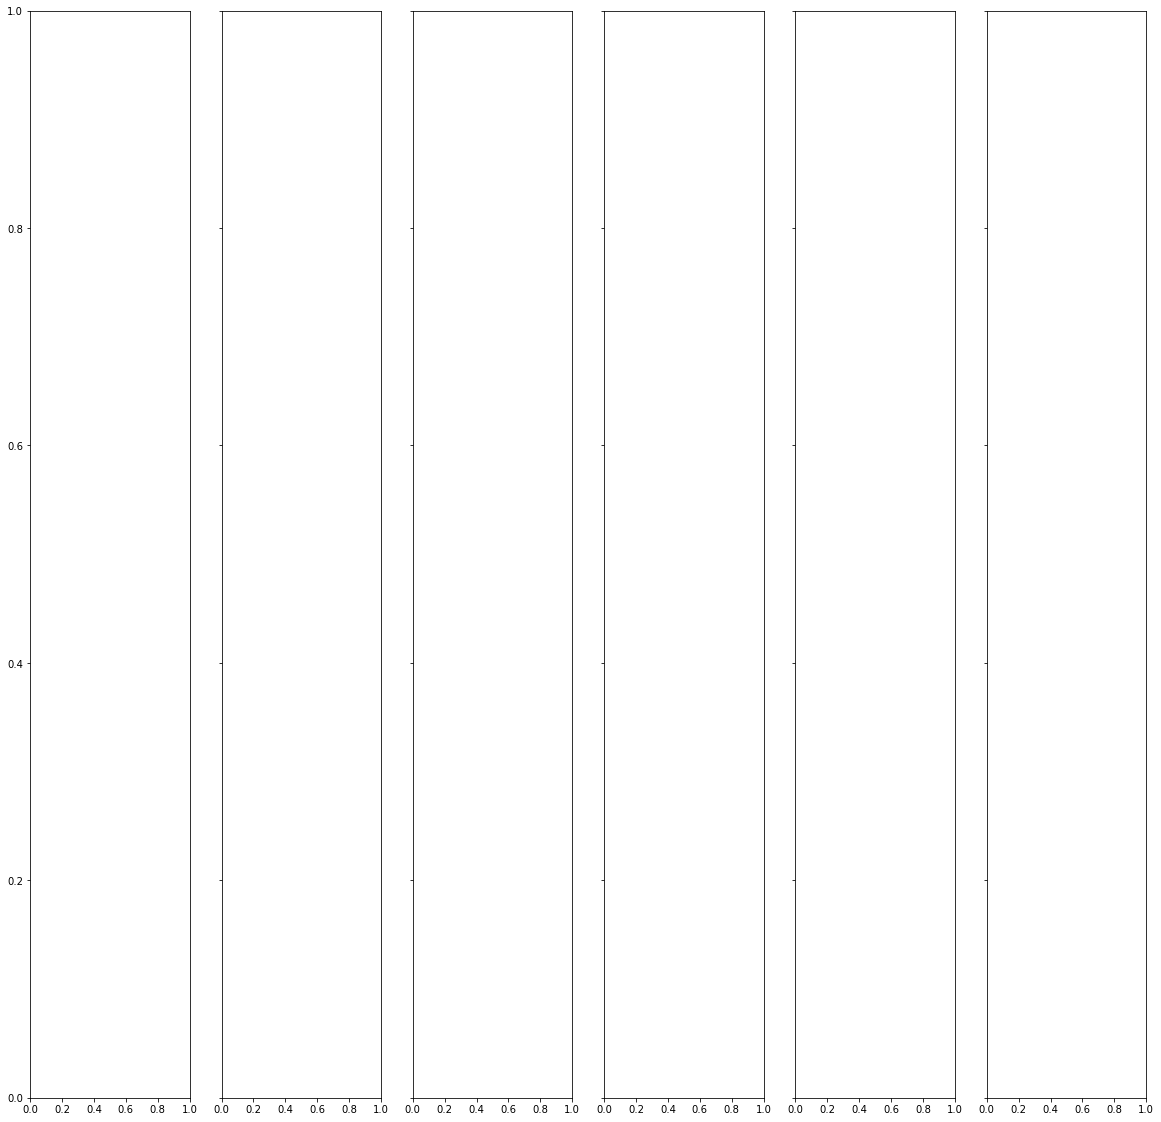

In [74]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(1, 6, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Summarization

In [75]:
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 


def text_summaization(text):
    # Input text - to summarize  
      
    # Tokenizing the text 
    stopWords = set(stopwords.words("english")) 
    words = word_tokenize(text) 
   
    # Creating a frequency table to keep the  
    # score of each word 
   
    freqTable = dict() 
    for word in words: 
        word = word.lower() 
        if word in stopWords: 
            continue
        if word in freqTable: 
            freqTable[word] += 1
        else: 
            freqTable[word] = 1
   
    # Creating a dictionary to keep the score 
    # of each sentence 
    sentences = sent_tokenize(text) 
    sentenceValue = dict() 
   
    for sentence in sentences: 
        for word, freq in freqTable.items(): 
            if word in sentence.lower(): 
                if sentence in sentenceValue: 
                    sentenceValue[sentence] += freq 
                else: 
                    sentenceValue[sentence] = freq 
   
   
   
    sumValues = 0
    for sentence in sentenceValue: 
        sumValues += sentenceValue[sentence] 
   
    # Average value of a sentence from the original text 
   
    average = int(sumValues / len(sentenceValue)) 
   
    # Storing sentences into our summary. 
    summary = '' 
    for sentence in sentences: 
        if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)): 
            summary += " " + sentence 
    print("Summarized Text::")
    print(summary) 
    
    return summary

In [76]:
filtered_reviews1['summary']=filtered_reviews1['content'].apply(lambda x: text_summaization(x))

Summarized Text::
 Validation errors causing most of my saves to not even work It'll reach a point where EVERY single pin takes me to a link and I can't see or pin the actual image What happened to the hold and save function?
Summarized Text::

Summarized Text::
 The inability to pin to multiple boards is now the bane of my existence & takes away SO much for me, like pinning to a shared AND a private board ; also I really miss the hold+drag feature, not only is it basically reflex but it was fun & less boring [altho I get that it could be a mobility friendly change I'm just sad LuL 🙃]
Summarized Text::
 Like I loved how you could hover over a pin and you could save it with the small menu. Also the fact I may just be stupid but I can't seem to find the 'watch' botton to watch the little reels they had, and that was a better way to watch videos.
Summarized Text::
 It's way more clunky and inefficient to pull up a whole menu at the bottom to pin a pin from a UI stand point. Press and hold

C:\Users\Karishma P\AppData\Local\Temp\ipykernel_13148\1738599520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_reviews1['summary']=filtered_reviews1['content'].apply(lambda x: text_summaization(x))


In [77]:
filtered_reviews1.head()

,content,score,Sentiment,sentiment_cat,Word_Count,Cleansed,summary
80,The scroll function is sooooooo broken. It wan...,1,-0.3506,negative,103,scroll function sooooooo break scroll entire p...,Validation errors causing most of my saves to...
329,Hii a great time with the kids and your mom ar...,5,0.9182,positive,104,hii great time kid mom kid day 'll kid kid ang...,
1566,Edit: 12/12/23 -- so last time I left a review...,1,-0.3809,negative,101,edit 12/12/23 time leave review bug app unusab...,The inability to pin to multiple boards is no...
1585,I was going to do 2 stars to be nice. But clea...,1,0.9386,positive,103,star nice update love hover pin save small men...,Like I loved how you could hover over a pin a...
1944,Bring back the little circle pin feature!!! It...,2,0.4742,positive,101,bring back circle pin feature clunky inefficie...,It's way more clunky and inefficient to pull ...
